## 빠른배송과 일반배송의 거래가 차이의 평균

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import font_manager, rc

# 한글 폰트 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'  # 'Nanum Gothic'을 설치한 경우 해당 폰트로 설정 가능
plt.rcParams['font.family'] = 'Nanum Gothic'  # 'Nanum Gothic'을 설치한 경우 해당 폰트로 설정 가능

In [2]:
df = pd.read_csv('CSV/나이키 덩크 로우 레트로 블랙 | Nike | KREAM.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  21000 non-null  int64 
 1   거래일         21000 non-null  object
 2   옵션          21000 non-null  int64 
 3   거래가         21000 non-null  object
 4   빠른배송        21000 non-null  bool  
dtypes: bool(1), int64(2), object(2)
memory usage: 676.9+ KB


In [4]:

df.head()

,Unnamed: 0,거래일,옵션,거래가,빠른배송
0,0,24/09/28,270,"97,000원",True
1,1,24/09/27,270,"92,000원",False
2,2,24/09/27,270,"97,000원",True
3,3,24/09/27,270,"96,000원",True
4,4,24/09/27,270,"96,000원",True


In [5]:
df['거래일'] = pd.to_datetime(df['거래일'], format='%y/%m/%d')

In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  21000 non-null  int64         
 1   거래일         21000 non-null  datetime64[ns]
 2   옵션          21000 non-null  int64         
 3   거래가         21000 non-null  object        
 4   빠른배송        21000 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(1)
memory usage: 676.9+ KB


In [7]:
df.head()

,Unnamed: 0,거래일,옵션,거래가,빠른배송
0,0,2024-09-28,270,"97,000원",True
1,1,2024-09-27,270,"92,000원",False
2,2,2024-09-27,270,"97,000원",True
3,3,2024-09-27,270,"96,000원",True
4,4,2024-09-27,270,"96,000원",True


In [8]:

df['거래가'] = df['거래가'].str.replace('원','').str.replace(',','').astype(int)

In [9]:
df.head()

,Unnamed: 0,거래일,옵션,거래가,빠른배송
0,0,2024-09-28,270,97000,True
1,1,2024-09-27,270,92000,False
2,2,2024-09-27,270,97000,True
3,3,2024-09-27,270,96000,True
4,4,2024-09-27,270,96000,True


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Nanum Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


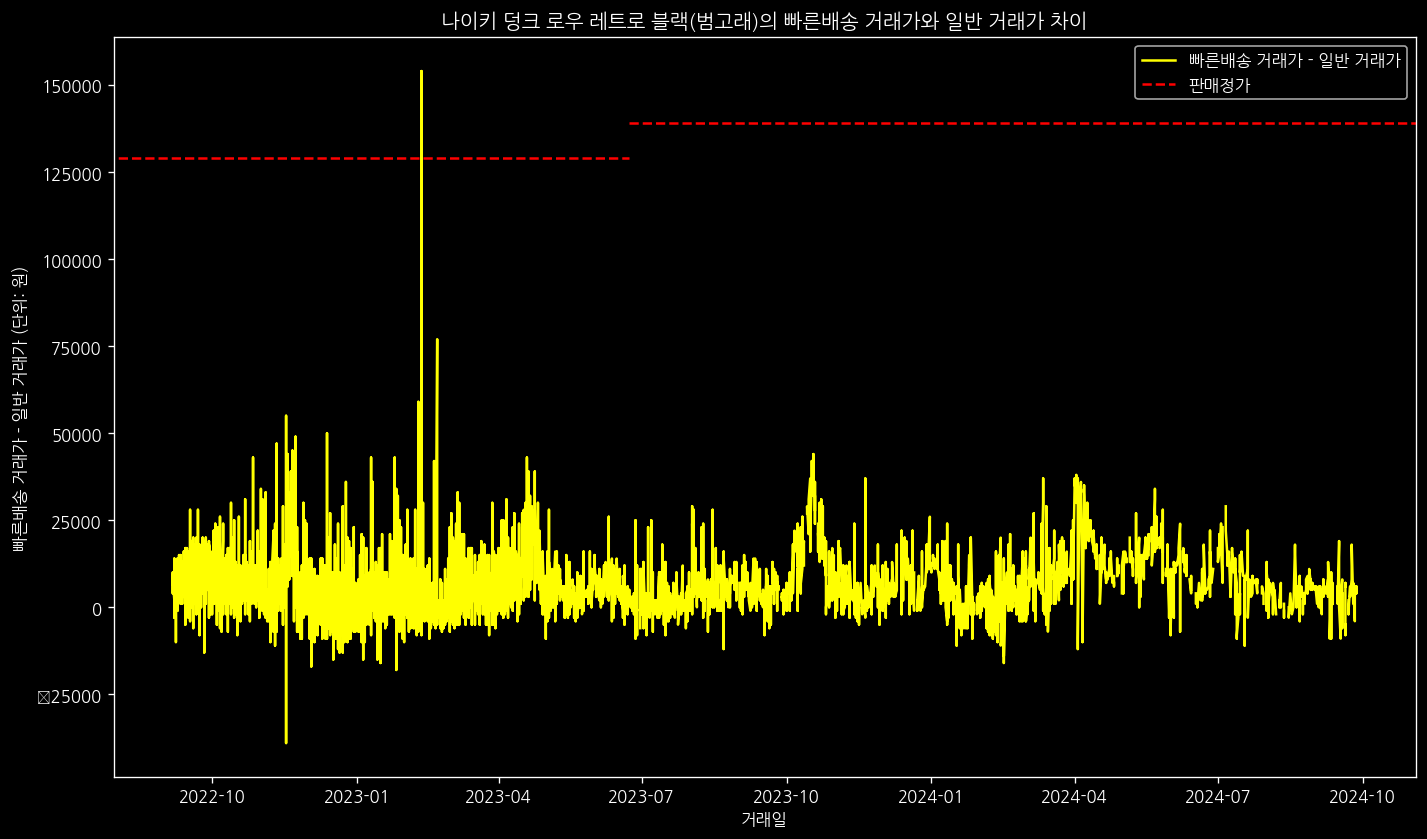

In [10]:
# 나머지 그래프 코드
plt.style.use('dark_background')
plt.figure(figsize=(14,8), dpi=120)

# 빠른배송이 True인 거래가에서 False인 거래가를 뺀 차이 계산
df_diff = df[df['빠른배송'] == True].set_index('거래일')['거래가'] - df[df['빠른배송'] == False].set_index('거래일')['거래가']

# 그래프 그리기
plt.plot(df_diff.index, df_diff.values, color='yellow', label='빠른배송 거래가 - 일반 거래가')

plt.axhline(y=119000, color='red', linestyle='--', xmin=0, xmax=(pd.to_datetime('2022-01-01') - df['거래일'].min()).days / (df['거래일'].max() - df['거래일'].min()).days)
plt.axhline(y=129000, color='red', linestyle='--', xmin=(pd.to_datetime('2022-01-01') - df['거래일'].min()).days / (df['거래일'].max() - df['거래일'].min()).days, xmax=(pd.to_datetime('2023-07-01') - df['거래일'].min()).days / (df['거래일'].max() - df['거래일'].min()).days)
plt.axhline(y=139000, color='red', linestyle='--', xmin=(pd.to_datetime('2023-07-01') - df['거래일'].min()).days / (df['거래일'].max() - df['거래일'].min()).days, label='판매정가')

plt.xlabel('거래일')
plt.ylabel('빠른배송 거래가 - 일반 거래가 (단위: 원)')
plt.title('나이키 덩크 로우 레트로 블랙(범고래)의 빠른배송 거래가와 일반 거래가 차이')
plt.legend()

plt.show()

In [11]:
import pandas as pd

# 빠른배송이 True인 거래가에서 False인 거래가를 뺀 차이 계산
df_diff = df[df['빠른배송'] == True].set_index('거래일')['거래가'] - df[df['빠른배송'] == False].set_index('거래일')['거래가']

# 가장 큰 값 제외
df_diff_without_max = df_diff[df_diff != df_diff.max()]

# 차이값들의 평균 계산
mean_diff = df_diff_without_max.mean()

# 결과 출력
print("빠른배송 거래가 - 일반 거래가 차이 (가장 큰 값 제외)")
print(df_diff_without_max)
print(f"\n가장 큰 값을 제외한 차이값의 평균: {mean_diff}")

빠른배송 거래가 - 일반 거래가 차이 (가장 큰 값 제외)
거래일
2022-09-06    9000.0
2022-09-06    9000.0
2022-09-06    6000.0
2022-09-06    8000.0
2022-09-06    7000.0
               ...  
2024-09-27    4000.0
2024-09-27    5000.0
2024-09-27    4000.0
2024-09-27    5000.0
2024-09-28       NaN
Name: 거래가, Length: 285810, dtype: float64

가장 큰 값을 제외한 차이값의 평균: 4313.417733928059
